In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
dict_import_nodes = {}

for file in os.listdir(os.getcwd() + '\\fbc'):
    dict_import_nodes[file.split('.')[0]] = pd.read_csv('fbc/' + file)
    print('Loaded {}'.format(file))

Loaded 3VAC1.csv
Loaded 3VAC2.csv
Loaded 3VAE1.csv
Loaded 3VAE2.csv
Loaded 3VAF1.csv
Loaded 3VAF2.csv
Loaded 3VAG1.csv
Loaded 3VAH1.csv
Loaded 3VAH2.csv
Loaded 3VAJ2.csv
Loaded 3VAK1.csv
Loaded 3VAK2.csv
Loaded 3WBE1.csv
Loaded 3WBM1.csv
Loaded 3WBN1.csv
Loaded ATLA1.csv
Loaded H005A.csv
Loaded H005B.csv
Loaded H0182.csv
Loaded H030C.csv
Loaded H070A.csv
Loaded H070C.csv
Loaded H071A.csv
Loaded H071B.csv
Loaded MC050.csv
Loaded MGABT.csv
Loaded MM103.csv
Loaded MM104.csv
Loaded MM106.csv
Loaded MM109.csv
Loaded MM119.csv
Loaded MM122.csv
Loaded MM126.csv
Loaded MM157.csv
Loaded W012B.csv
Loaded W056E.csv
Loaded W081A.csv
Loaded W086A.csv
Loaded W091A.csv
Loaded W100A.csv


In [3]:
def clean_amplitudes(fbc):
    res = [int(i) for i in fbc.strip('][').split(', ')]
    return res

def distance(fbc1, fbc2, dillution=3):
    n = len(fbc1)
    if n != len(fbc2):
        print("fbcs are different sizes")
        return None
    else:
        d = 0
        for i in range(0,n,dillution):
            d = d + abs(fbc1[i] - fbc2[i])
        return d

def frequencies_vector(df):
    f_indexes = [df["first"][0], df["last"][0], df["span"][0]]
    same = True
    for iter, row in df.iterrows():
        if [row["first"], row["last"], row["span"]] != f_indexes:
            same = False
            break

    if same:
        n = len(df["amplitudes"][0])
        freq = [df["first"][0] + j*df["span"][0] / (n-1) for j in range(n)]
        df["frequencies"] = df.apply(lambda row: freq, axis=1)

    else:
        df.apply(lambda row: [row["first"] + j*row["span"] /(len(row["amplitudes"])-1) for j in range(len(row["amplitudes"]))], axis=1)

In [4]:
pd_3VAC1 = dict_import_nodes['3VAC1']

In [5]:
display(pd_3VAC1.head())
pd_3VAC1.columns

,oper_status,status_detail,poller_source,device_id,collection_time,span,bins,first,last,amplitudes,offset,partition,load_dt,site_id
0,SUCCESS,Successful Scan,ACS,3c:04:61:fe:1e:81,2021-12-31 14:17:24.315516,60000000,512,36000000,996000000,"[-6262, -6033, -6128, -6434, -6424, -6254, -62...",24767063,0,2021-12-31,1
1,SUCCESS,Successful Scan,ACS,58:19:f8:2a:ce:a7,2021-12-31 03:37:44.558435,60000000,512,36000000,996000000,"[-6612, -6627, -6640, -6914, -7127, -6670, -64...",24741692,3,2021-12-31,1
2,SUCCESS,Successful Scan,ACS,a8:97:cd:41:0e:f1,2021-12-31 22:12:33.482232,60000000,512,36000000,996000000,"[-4500, -4510, -4660, -4710, -4710, -4870, -48...",24791170,4,2021-12-31,1
3,SUCCESS,Successful Scan,ACS,b0:da:f9:3e:5d:c6,2021-12-31 02:25:25.461587,60000000,512,36000000,996000000,"[-4570, -4590, -4670, -4690, -4690, -4660, -46...",24734587,0,2021-12-31,1
4,SUCCESS,Successful Scan,ACS,d4:04:cd:d6:f3:5d,2021-12-31 08:23:28.237695,60000000,512,36000000,996000000,"[-6678, -6531, -6430, -6245, -6531, -6476, -66...",24754079,1,2021-12-31,1


Index(['oper_status', 'status_detail', 'poller_source', 'device_id',
       'collection_time', 'span', 'bins', 'first', 'last', 'amplitudes',
       'offset', 'partition', 'load_dt', 'site_id'],
      dtype='object')

In [10]:
for col in ['oper_status', 'status_detail', 'poller_source', 'span', 'bins', 'first', 'last', 'partition', 'load_dt', 'site_id']:
    print(col)
    display(pd_3VAC1[col].unique())

oper_status


array(['SUCCESS'], dtype=object)

status_detail


array(['Successful Scan'], dtype=object)

poller_source


array(['ACS'], dtype=object)

span


array([60000000], dtype=int64)

bins


array([512], dtype=int64)

first


array([36000000], dtype=int64)

last


array([996000000], dtype=int64)

partition


array([0, 3, 4, 1, 2], dtype=int64)

load_dt


array(['2021-12-31'], dtype=object)

site_id


array([1], dtype=int64)

In [16]:
len(pd_3VAC1.amplitudes[7])

60928

In [7]:
((pd_3VAC1['last'].mean() - pd_3VAC1['first'].mean()) / pd_3VAC1['span'].mean() + 1)*pd_3VAC1['bins'].mean()

8704.0

In [8]:
pd_3VAC1['offset'].mean()

24763391.686424475

In [9]:
(pd_3VAC1['last'].mean() - pd_3VAC1['first'].mean()) / 2

480000000.0

In [11]:
pd_3VAC1_c = pd_3VAC1[["device_id", "span", "first", "last", "amplitudes", "offset"]].copy()
pd_3VAC1_c.head()

,device_id,span,first,last,amplitudes,offset
0,3c:04:61:fe:1e:81,60000000,36000000,996000000,"[-6262, -6033, -6128, -6434, -6424, -6254, -62...",24767063
1,58:19:f8:2a:ce:a7,60000000,36000000,996000000,"[-6612, -6627, -6640, -6914, -7127, -6670, -64...",24741692
2,a8:97:cd:41:0e:f1,60000000,36000000,996000000,"[-4500, -4510, -4660, -4710, -4710, -4870, -48...",24791170
3,b0:da:f9:3e:5d:c6,60000000,36000000,996000000,"[-4570, -4590, -4670, -4690, -4690, -4660, -46...",24734587
4,d4:04:cd:d6:f3:5d,60000000,36000000,996000000,"[-6678, -6531, -6430, -6245, -6531, -6476, -66...",24754079


In [18]:
pd_3VAC1_c["amplitudes"] = pd_3VAC1["amplitudes"].apply(clean_amplitudes)
pd_3VAC1_c.head()

,device_id,span,first,last,amplitudes,offset
0,3c:04:61:fe:1e:81,60000000,36000000,996000000,"[-6262, -6033, -6128, -6434, -6424, -6254, -62...",24767063
1,58:19:f8:2a:ce:a7,60000000,36000000,996000000,"[-6612, -6627, -6640, -6914, -7127, -6670, -64...",24741692
2,a8:97:cd:41:0e:f1,60000000,36000000,996000000,"[-4500, -4510, -4660, -4710, -4710, -4870, -48...",24791170
3,b0:da:f9:3e:5d:c6,60000000,36000000,996000000,"[-4570, -4590, -4670, -4690, -4690, -4660, -46...",24734587
4,d4:04:cd:d6:f3:5d,60000000,36000000,996000000,"[-6678, -6531, -6430, -6245, -6531, -6476, -66...",24754079


In [17]:
len(pd_3VAC1_c.amplitudes[7])

8704

In [19]:
((pd_3VAC1['last'].mean() - pd_3VAC1['first'].mean()) / pd_3VAC1['span'].mean() + 1)*pd_3VAC1['bins'].mean()

8704.0

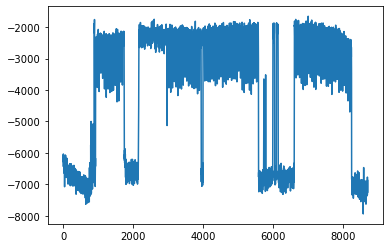

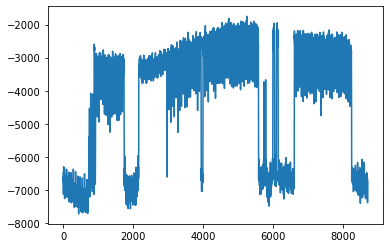

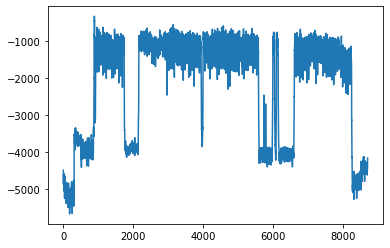

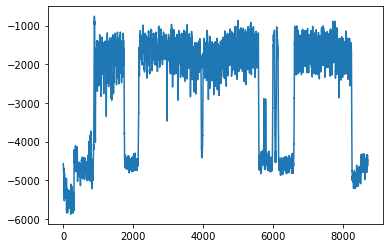

In [13]:
for i in range(4):
    ls_amp = pd_3VAC1_c.amplitudes[i]
    sns.lineplot(x=list(range(len(ls_amp))), y=ls_amp)
    plt.show()

In [14]:
np.array(ls_amp[:100]).min()

-5810

In [15]:
np.array(ls_amp[-100:]).min()

-4980

In [78]:
ls_amp

[-1428,
 -1239,
 -1293,
 -1106,
 -1319,
 -1185,
 -1070,
 -1092,
 -1109,
 -1088,
 -1327,
 -1344,
 -1443,
 -1294,
 -1398,
 -1291,
 -1489,
 -1627,
 -1507,
 -1396,
 -1240,
 -1364,
 -1362,
 -1327,
 -1578,
 -1460,
 -1582,
 -1392,
 -1164,
 -1266,
 -1406,
 -1356,
 -1269,
 -1214,
 -1123,
 -1566,
 -1714,
 -1418,
 -1192,
 -1318,
 -1061,
 -1274,
 -1366,
 -1346,
 -1317,
 -1658,
 -1464,
 -1460,
 -1655,
 -1587,
 -1390,
 -1374,
 -1320,
 -1248,
 -1197,
 -1268,
 -1140,
 -1311,
 -1367,
 -1837,
 -1637,
 -1482,
 -1477,
 -1523,
 -1349,
 -1377,
 -1228,
 -1505,
 -1192,
 -1438,
 -1578,
 -1498,
 -1656,
 -1500,
 -1626,
 -1659,
 -1346,
 -1239,
 -1417,
 -1277,
 -1314,
 -1327,
 -1553,
 -1542,
 -1622,
 -1790,
 -1499,
 -1364,
 -1286,
 -1078,
 -1404,
 -1470,
 -1262,
 -1278,
 -1264,
 -1297,
 -1771,
 -1931,
 -1290,
 -1474,
 -1159,
 -1381,
 -1624,
 -1653,
 -1353,
 -1340,
 -1394,
 -1526,
 -1877,
 -1627,
 -1452,
 -1723,
 -1651,
 -1454,
 -1699,
 -1500,
 -1394,
 -1694,
 -1841,
 -1714,
 -1609,
 -1547,
 -1568,
 -1534,
 -1435,


8704


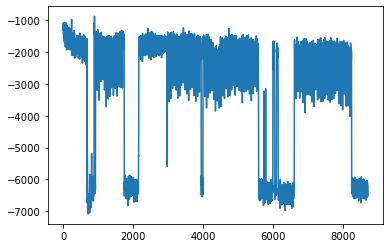

In [77]:
ls_amp = pd_3VAC1_c.amplitudes[377]
print(len(ls_amp))
sns.lineplot(x=list(range(len(ls_amp))), y=ls_amp)
plt.show()

In [73]:
pd_amplitudes[pd_amplitudes == pd_amplitudes.min()]

376    49444
Name: amplitudes, dtype: int64

In [80]:
pd_3VAC1_c

,device_id,span,first,last,amplitudes,offset
0,3c:04:61:fe:1e:81,60000000,36000000,996000000,"[-6262, -6033, -6128, -6434, -6424, -6254, -62...",24767063
1,58:19:f8:2a:ce:a7,60000000,36000000,996000000,"[-6612, -6627, -6640, -6914, -7127, -6670, -64...",24741692
2,a8:97:cd:41:0e:f1,60000000,36000000,996000000,"[-4500, -4510, -4660, -4710, -4710, -4870, -48...",24791170
3,b0:da:f9:3e:5d:c6,60000000,36000000,996000000,"[-4570, -4590, -4670, -4690, -4690, -4660, -46...",24734587
4,d4:04:cd:d6:f3:5d,60000000,36000000,996000000,"[-6678, -6531, -6430, -6245, -6531, -6476, -66...",24754079
...,...,...,...,...,...,...
1041,98:52:4a:07:80:ff,60000000,36000000,996000000,"[-1262, -1436, -1118, -1104, -1057, -1363, -11...",24771748
1042,98:f7:d7:b8:e6:f9,60000000,36000000,996000000,"[-5411, -5340, -5381, -5258, -5445, -5364, -52...",24774986
1043,08:a7:c0:a3:f0:ba,60000000,36000000,996000000,"[-1711, -1483, -1383, -1197, -985, -1064, -101...",24768300
1044,a8:97:cd:40:37:a5,60000000,36000000,996000000,"[-4720, -4740, -4880, -4920, -4920, -5030, -50...",24762852


In [82]:
pd_amplitudes = pd_3VAC1_c.amplitudes.apply(len)
pd_amplitudes.mean()

8704.0

In [87]:
frequencies_vector(pd_3VAC1_c)

In [88]:
pd_3VAC1_c

,device_id,span,first,last,amplitudes,offset,frequencies
0,3c:04:61:fe:1e:81,60000000,36000000,996000000,"[-6262, -6033, -6128, -6434, -6424, -6254, -62...",24767063,"[36000000.0, 36006894.174422614, 36013788.3488..."
1,58:19:f8:2a:ce:a7,60000000,36000000,996000000,"[-6612, -6627, -6640, -6914, -7127, -6670, -64...",24741692,"[36000000.0, 36006894.174422614, 36013788.3488..."
2,a8:97:cd:41:0e:f1,60000000,36000000,996000000,"[-4500, -4510, -4660, -4710, -4710, -4870, -48...",24791170,"[36000000.0, 36006894.174422614, 36013788.3488..."
3,b0:da:f9:3e:5d:c6,60000000,36000000,996000000,"[-4570, -4590, -4670, -4690, -4690, -4660, -46...",24734587,"[36000000.0, 36006894.174422614, 36013788.3488..."
4,d4:04:cd:d6:f3:5d,60000000,36000000,996000000,"[-6678, -6531, -6430, -6245, -6531, -6476, -66...",24754079,"[36000000.0, 36006894.174422614, 36013788.3488..."
...,...,...,...,...,...,...,...
1041,98:52:4a:07:80:ff,60000000,36000000,996000000,"[-1262, -1436, -1118, -1104, -1057, -1363, -11...",24771748,"[36000000.0, 36006894.174422614, 36013788.3488..."
1042,98:f7:d7:b8:e6:f9,60000000,36000000,996000000,"[-5411, -5340, -5381, -5258, -5445, -5364, -52...",24774986,"[36000000.0, 36006894.174422614, 36013788.3488..."
1043,08:a7:c0:a3:f0:ba,60000000,36000000,996000000,"[-1711, -1483, -1383, -1197, -985, -1064, -101...",24768300,"[36000000.0, 36006894.174422614, 36013788.3488..."
1044,a8:97:cd:40:37:a5,60000000,36000000,996000000,"[-4720, -4740, -4880, -4920, -4920, -5030, -50...",24762852,"[36000000.0, 36006894.174422614, 36013788.3488..."


In [15]:
pd_devices.head()

,oper_status,status_detail,poller_source,device_id,collection_time,span,bins,first,last,amplitudes,offset,partition,load_dt,site_id
0,SUCCESS,Successful Scan,ACS,3c:04:61:fe:1e:81,2021-12-31 14:17:24.315516,60000000,512,36000000,996000000,"[-6262, -6033, -6128, -6434, -6424, -6254, -62...",24767063,0,2021-12-31,1
1,SUCCESS,Successful Scan,ACS,58:19:f8:2a:ce:a7,2021-12-31 03:37:44.558435,60000000,512,36000000,996000000,"[-6612, -6627, -6640, -6914, -7127, -6670, -64...",24741692,3,2021-12-31,1
2,SUCCESS,Successful Scan,ACS,a8:97:cd:41:0e:f1,2021-12-31 22:12:33.482232,60000000,512,36000000,996000000,"[-4500, -4510, -4660, -4710, -4710, -4870, -48...",24791170,4,2021-12-31,1
3,SUCCESS,Successful Scan,ACS,b0:da:f9:3e:5d:c6,2021-12-31 02:25:25.461587,60000000,512,36000000,996000000,"[-4570, -4590, -4670, -4690, -4690, -4660, -46...",24734587,0,2021-12-31,1
4,SUCCESS,Successful Scan,ACS,d4:04:cd:d6:f3:5d,2021-12-31 08:23:28.237695,60000000,512,36000000,996000000,"[-6678, -6531, -6430, -6245, -6531, -6476, -66...",24754079,1,2021-12-31,1


In [16]:
pd_devices.count()

oper_status        26557
status_detail      26557
poller_source      26557
device_id          26557
collection_time    26557
span               26557
bins               26557
first              26557
last               26557
amplitudes         26557
offset             26557
partition          26557
load_dt            26557
site_id            26557
dtype: int64

In [21]:
len(pd_devices.device_id.unique())

8870